In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [8]:
#!/bin/bash
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:11<00:00, 76.9MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.9MB/s]


In [9]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [11]:
#generators
train_ds =keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds =keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [20]:
#create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - accuracy: 0.5704 - loss: 2.9377 - val_accuracy: 0.6332 - val_loss: 0.6389
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.6578 - loss: 0.6322 - val_accuracy: 0.6608 - val_loss: 0.6394
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.7418 - loss: 0.5205 - val_accuracy: 0.7388 - val_loss: 0.5786
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.7742 - loss: 0.4862 - val_accuracy: 0.7324 - val_loss: 0.5615
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8188 - loss: 0.3973 - val_accuracy: 0.7822 - val_loss: 0.4931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 81ms/step - accuracy: 0.8379 - loss: 0.3523 - val_accuracy: 0.5960 - val_loss: 1.0945
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 73ms/step - accuracy: 0.8708 - loss: 0.2910 - val_accuracy: 0.7700 - val_loss: 0.5208
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 81ms/step - accuracy: 0.9001 - loss: 0.2348 - 

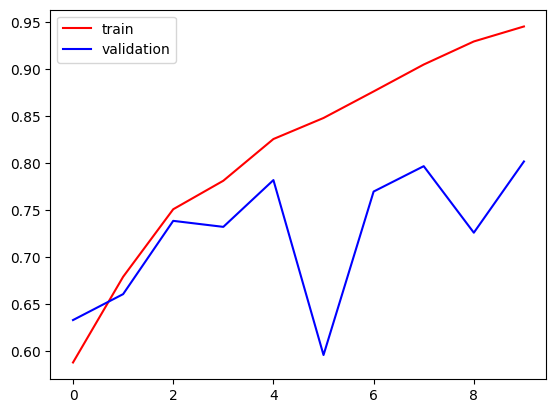

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

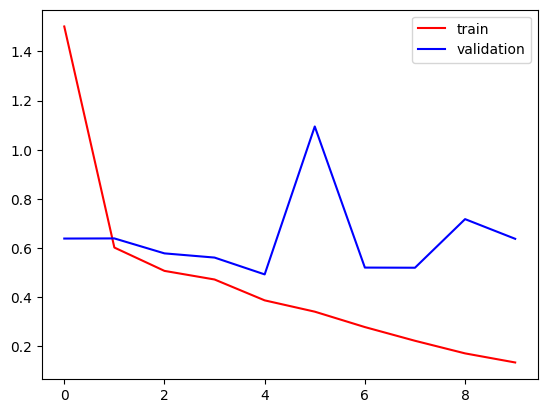

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#Add more data
#Data Augmentation
#L1/L2 Regularization
#Early Dropout
#Batch Norm
#Reduce Complexity

In [34]:
import cv2

**Download a random dog/cat image**

In [35]:
#test an image
test_img = cv2.imread('/content/dog.jpg')



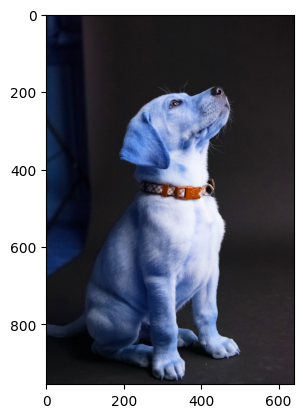

In [36]:
plt.imshow(test_img)

In [38]:
#Check the size of the image
test_img.shape

(955, 640, 3)

In [39]:
#Resize the image
test_img = cv2.resize(test_img,(256,256))

In [40]:
#This reshaping is often necessary to prepare a single image for prediction with a neural network model that expects a batch of images (even if the batch size is one).
test_input = test_img.reshape((1,256,256,3))

1.A value close to 1 typically indicates that the model predicts the image belongs to the class labeled as '1' (in this case, likely 'dog' based on the dataset).

2.A value close to 0 would indicate that the model predicts the image belongs to the class labeled as '0' (likely 'cat').

In [41]:
#predict the image
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

Now let's test a Cat

In [42]:
test_img = cv2.imread('/content/cat.jpg')

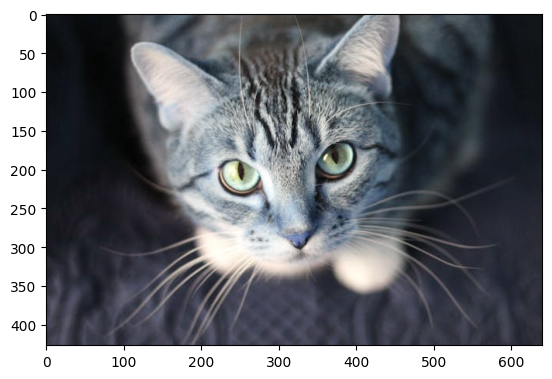

In [43]:
plt.imshow(test_img)

In [44]:
#Check the size of the image
test_img.shape

(427, 640, 3)

In [45]:
#Resize the image
test_img = cv2.resize(test_img,(256,256))

In [46]:
#This reshaping is often necessary to prepare a single image for prediction with a neural network model that expects a batch of images (even if the batch size is one).
test_input = test_img.reshape((1,256,256,3))

In [47]:
#predict the image
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.13832888]], dtype=float32)

In [51]:
# Save in the TensorFlow SavedModel format
model.save('dogs_vs_cats_model.keras')
print("Model saved in SavedModel format.")

Model saved in SavedModel format.


In [52]:
# Assuming the output of model.predict(test_input) is stored in a variable called 'prediction'
prediction = model.predict(test_input)

if prediction > 0.5:
  print("The image is a Dog")
else:
  print("The image is a Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The image is a Cat


In [ ]:
#Next step is to create a user interface where we can upload an image